<a href="https://colab.research.google.com/github/bhagi8289/Insaid/blob/master/capstone_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from IPython.core.display import HTML
pd.options.mode.use_inf_as_na = True
pd.options.display.max_columns = None
pd.options.display.max_rows = None


from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)     
df_events_data = pd.read_pickle("/content/gdrive//My Drive/capstone/df_events_data3.pkl") 
df_gender_age_train = pd.read_pickle("/content/gdrive//My Drive/capstone/df_gender_age_train3.pkl") 
df_phone_brand_device_model = pd.read_pickle("/content/gdrive//My Drive/capstone/df_phone_brand_device_model3.pkl") 
#print("Success")
print("Visit https://myaccount.google.com/permissions to unmount")        

Mounted at /content/gdrive
Visit https://myaccount.google.com/permissions to unmount


In [123]:
df_events_data.info()
df_gender_age_train.info()
df_phone_brand_device_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252495 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     int64
device_id    int64
timestamp    datetime64[ns]
longitude    float64
latitude     float64
city         object
state        object
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 198.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null int64
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [124]:
# Distribution of Users(device_id) across States.
#from matplotlib import rcParams
#rcParams.update({'figure.autolayout': True})

filter_states = ['AndhraPradesh','Pondicherry','Mizoram','AndamanandNicobarIslands','Meghalaya','HimachalPradesh']
df_events_data_filtered = df_events_data[df_events_data.state.isin(filter_states)]
df_events_data_filtered.shape[0]
pie_chart_values = df_events_data_filtered.groupby('state')['device_id'].count().to_frame()
pie_chart_values.reset_index(level=0, inplace=True)
pie_chart_values
x = [i for i in pie_chart_values.values[:,0]]
y = [i for i in pie_chart_values.values[:,1]]
type(y)
len(y)
#y

6

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


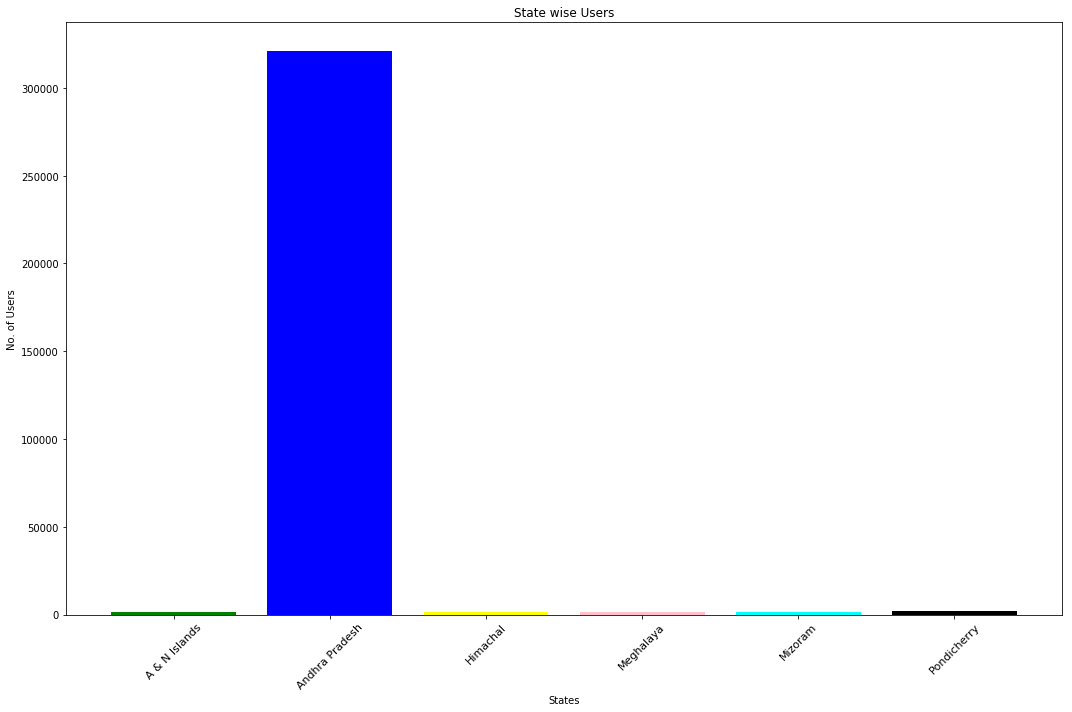

In [125]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
tick_label = ['A & N Islands','Andhra Pradesh','Himachal','Meghalaya','Mizoram','Pondicherry']
x = [i for i in range(len(x))]
fig = plt.bar(x,y,tick_label = tick_label, width = 0.8, color = ['green','blue','yellow','pink','cyan','black'])
plt.xticks(rotation=45, size=11)
plt.tight_layout()
#plt.set_size_inches(12, 8)


#L=plt.legend()
#L.get_texts()[0].set_text('No. of Users')
#L=fig.legend()
#L.get_texts()[0].set_text('No. of Users')

plt.xlabel('States')
plt.ylabel('No. of Users')
plt.title("State wise Users")

plt.savefig('/content/gdrive//My Drive/capstone/figure_1_State_wise_distribution.jpg', dpi=300)

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, ASUS to ZUK
Data columns (total 1 columns):
device_id    70 non-null int64
dtypes: int64(1)
memory usage: 1.1+ KB


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


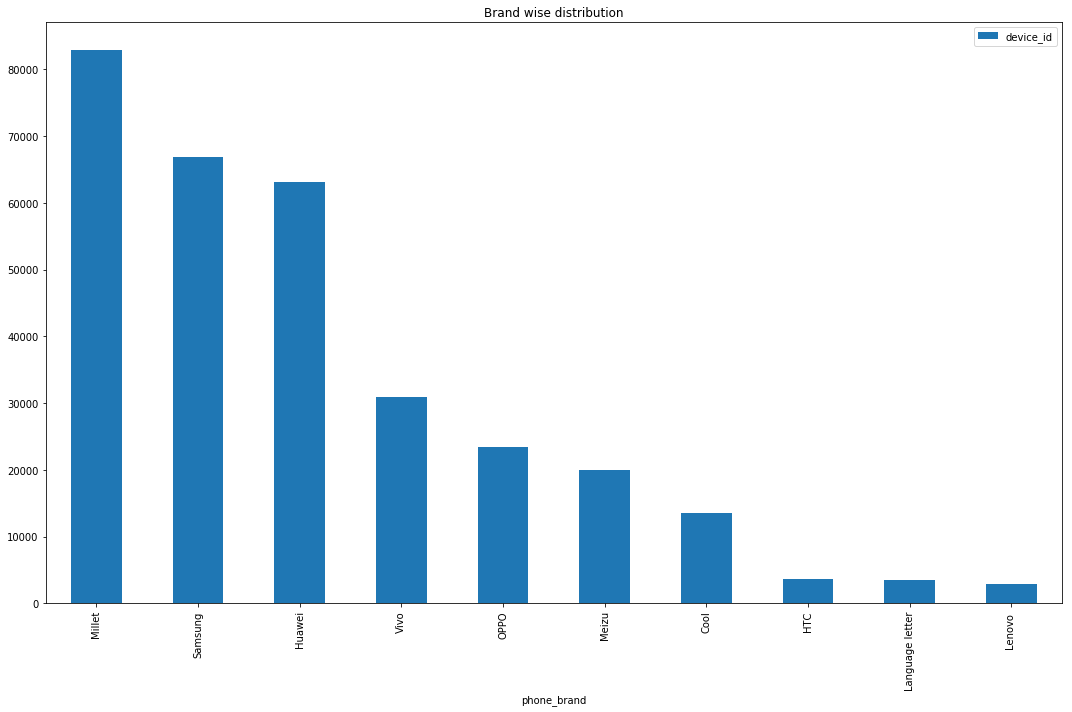

In [129]:
#Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).
#We left merge df_events_data with df_phone_brand_device_model
df_events_data
df_phone_brand_device_model
df_left = pd.merge(df_events_data, df_phone_brand_device_model, on='device_id', how='left')
filter_states = ['AndhraPradesh','Pondicherry','Mizoram','AndamanandNicobarIslands','Meghalaya','HimachalPradesh']
df_left_filtered = df_left[df_left.state.isin(filter_states)]
df_left.shape[0]
pie_chart_values = df_left_filtered.groupby('phone_brand')['device_id'].count().to_frame()
pie_chart_values.info()
pie_chart_values.nlargest(10,'device_id')
pie_chart_values.nlargest(10,'device_id').plot.bar(title='Brand wise distribution')

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, F to M
Data columns (total 1 columns):
device_id    2 non-null int64
dtypes: int64(1)
memory usage: 32.0+ bytes


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


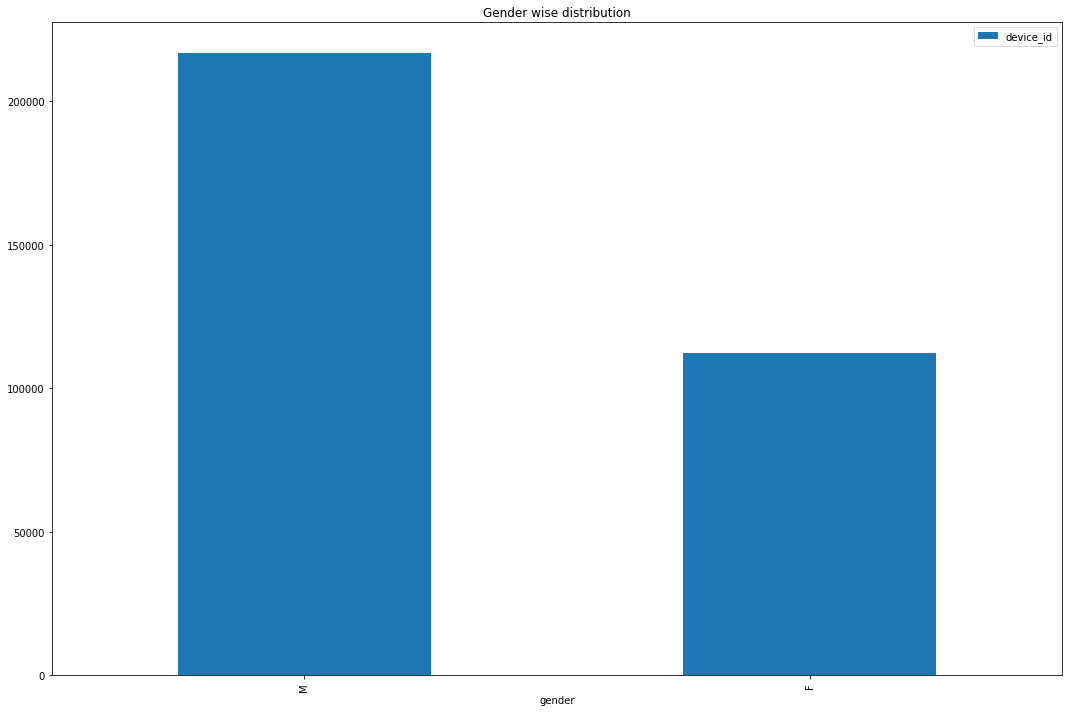

In [127]:
#Distribution of Users across Gender
#We left merge df_events_data with df_events_data and df_gender_age_train
df_events_data
df_gender_age_train
df_left = pd.merge(df_events_data, df_gender_age_train, on='device_id', how='left')
filter_states = ['AndhraPradesh','Pondicherry','Mizoram','AndamanandNicobarIslands','Meghalaya','HimachalPradesh']
df_left_filtered = df_left[df_left.state.isin(filter_states)]
df_left.shape[0]
pie_chart_values = df_left_filtered.groupby('gender')['device_id'].count().to_frame()
pie_chart_values.info()
pie_chart_values.nlargest(10,'device_id')
pie_chart_values.nlargest(10,'device_id').plot.bar(title='Gender wise distribution')

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, F23- to M39+
Data columns (total 1 columns):
device_id    12 non-null int64
dtypes: int64(1)
memory usage: 192.0+ bytes


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


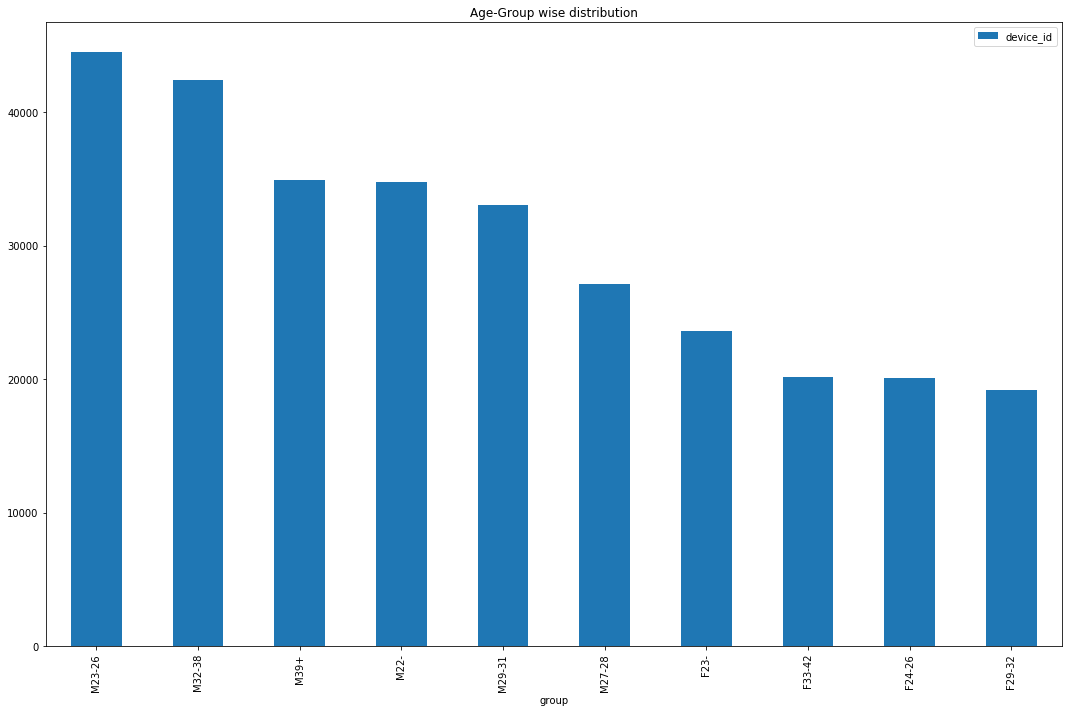

In [128]:
#Distribution of Users across Age Segments.
pie_chart_values = df_left_filtered.groupby('group')['device_id'].count().to_frame()
pie_chart_values.info()
pie_chart_values.nlargest(10,'device_id')
pie_chart_values.nlargest(10,'device_id').plot.bar(title='Age-Group wise distribution')
